# Lecture 2 - Pixels and Image Fitering
Image filters in spatial domain:
- Smoothing, sharpening, measuring texture

## Image Filtering
**Image filtering:** compute function of local neighborhood at each position

### Box Filter
$$
h[m,n] = \sum_{k,l} g[k,l]f[m+k, n+l]
$$
- Replaces each pixel with an average of its neighborhood.
- Achieve smoothing effect (remove sharp features).

But it would add edges artifiacts. 

### Other filters
**white:** positive value
**black:** negative value

- Identify filter: center is 1 and others 0.  
- Shift filter: e.g. filter(1, 2) = 1 and others 0 -> shifted left by 1 pixels. 
- Sharperning filter: filter(1,1)=2 - box filter -> accentuates differences with local average
- Vertical Edge (absolute value): filter(0,0)=1, (0,2)=-1; filter(1,0)=2, (1,2)=-2; filrer(2,0)=1, (2,2)=-1
- Horizontal Edge (absolute value): filter (0,0)=1, (2,0)=-1; filter(0,1)=2, (2,1)=2; filter(0,2)=1, (2,2)=-1

### Synthesize motion blur

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [11]:
# im: H x W x C matrix (np.ndarray)
im = cv2.imread('town.png') # read image
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # convert to RGB
im = im / 255 # values range from 0 to 1

In [36]:
theta = 30 # rotation angle in degrees for motion blur
len = 15 # length of motion blur
mid = (len - 1) / 2 # middle index of motion blur

In [37]:
filter = np.zeros((len, len))
filter[:, int(mid)] = 1/len 
R = cv2.getRotationMatrix2D((mid, mid), theta, 1)
filter = cv2.warpAffine(filter, R, (len, len))
im_filtered = cv2.filter2D(im, -1, filter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


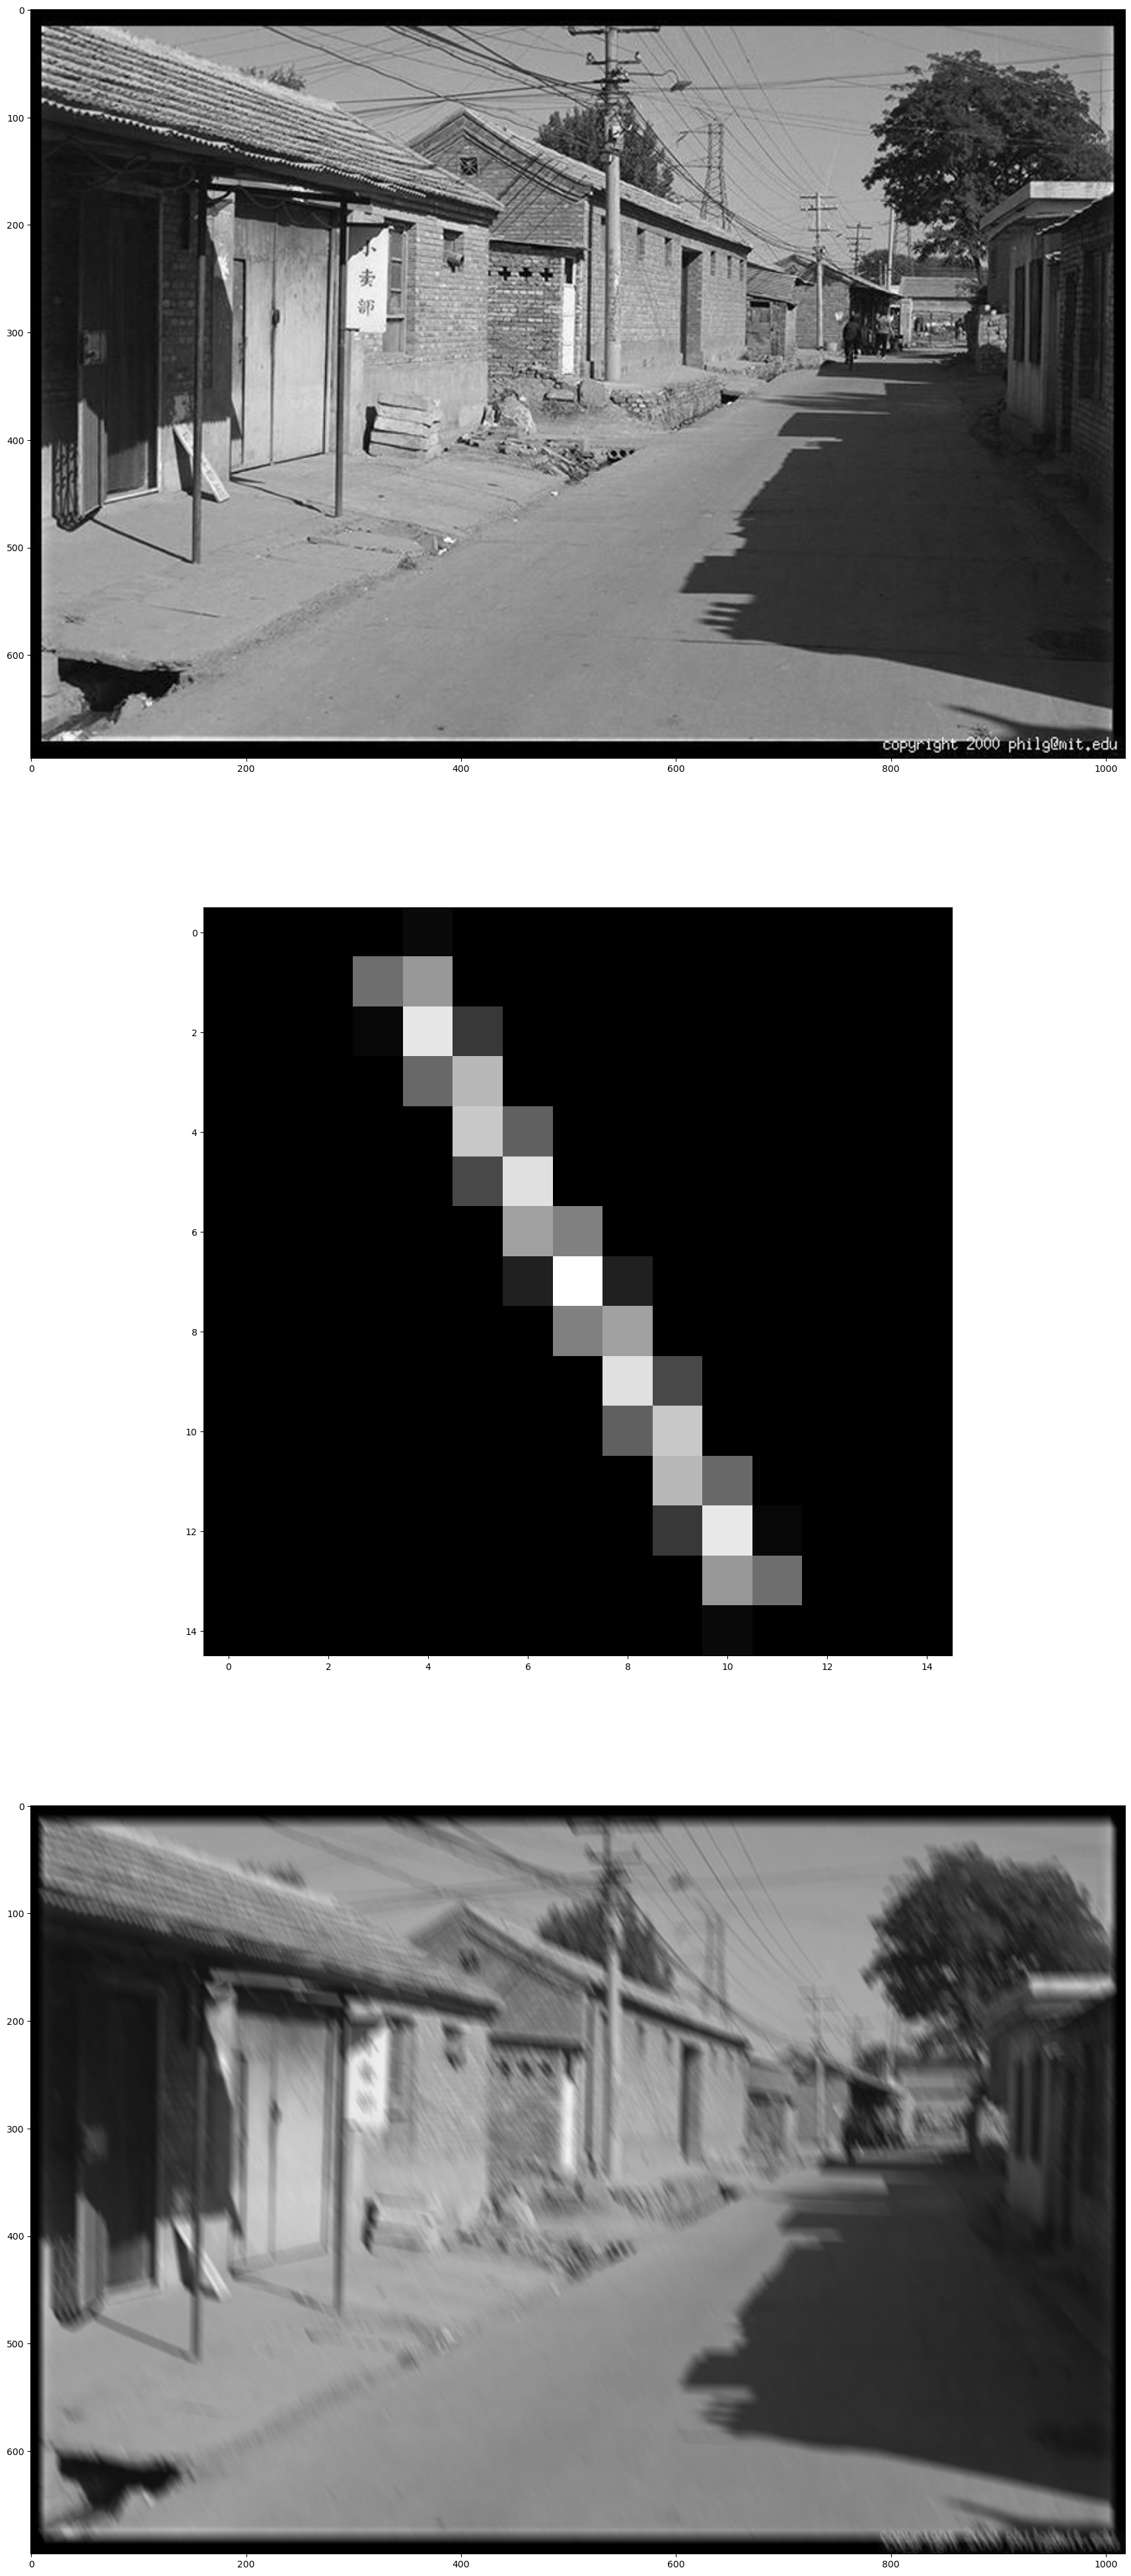

In [38]:
%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(50, 50))
axes[0].imshow(im, cmap='gray')
axes[1].imshow(filter, cmap='gray')
axes[2].imshow(im_filtered, cmap='gray')

## Gaussian Filter

- Low-pass filter: Remove "high-frequency" components from the image, becoming more smooth. 
- Convolution with self is another Gaussian. 
- Separable kernel: factors into product of two 1D Gaussians. 

## Practical matters

### Filter size
- Value at edges should be near zero.
- Rule of thumb for Gaussian: set kernel half-width to $>=3\sigma$, e.g. $\sigma=1$, filter size should be $7\times 7$

### Padding
- clip filter (black): convolve2d(f, g, boundary='fill', 0)
- wrap around: convolve2d(f, g, boundary='wrap')
- copy edge
- reflect across edge: convolve2d(f, g, boundary='symm')